# Python - Jupyter Project Environment
## Author: Jeffrey Grover
## Date: 2024-05-28
### Purpose:
This notebook demonstrates an example of a python data science/bioinformatics environment living
peacefully alongside its neighbor, an R environment, in the same project. The idea is, if you like
either language for different tasks then you can create well-documented environments for both in a
single repo, and use each language when you so desire.

This python example is intended to be run first.

### Get Some Test Data
These commands actually run in your shell outside the notebook and the python virtualenv.

In [1]:
# This test dataset is striaght from the pandas docs: https://pandas.pydata.org/docs/getting_started/intro_tutorials/02_read_write.html

! mkdir test_data
! wget "https://github.com/pandas-dev/pandas/raw/main/doc/data/titanic.csv" -P test_data

--2024-05-29 21:46:00--  https://github.com/pandas-dev/pandas/raw/main/doc/data/titanic.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv [following]
--2024-05-29 21:46:00--  https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘test_data/titanic.csv’

titanic.csv         100%[===================>]  58.89K  --.-KB/s    in 0.02s   

2024-05-29 21:46:00 (3.82 MB/s) - ‘test_data/titanic.csv’ saved [60302/60302]



In [2]:
# Confirm that the test data was downloaded correctly

! ls test_data/

titanic.csv


In [16]:
# Create a directory in which to place any results you wish to save
# I name these the same as the notebook file

! mkdir "polyglot_jupyter_example_py"

### Load Modules

In [3]:
# Load required modules

import pandas as pd
import seaborn as sns

### Load the Test Data

In [4]:
# Load the test data from the directory we made earlier

titanic = pd.read_csv("test_data/titanic.csv")

In [5]:
# Inspect the dataframe

titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Do Some "Analysis"
Question: Did different classes have different survival rates?

In [7]:
# Are there any NAs in the Survived and Pclass columns?

titanic.isnull().sum(axis = 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Result:** It looks like all the NAs are in other columns, so this shouldn't affect our "analysis."

In [8]:
# Make a copy of the dataset for working

titanic_survival = titanic.copy()

In [9]:
# Convert survived to boolean because it makes things clearer

titanic_survival["Survived"] = titanic_survival["Survived"].astype(bool)

In [10]:
# We only need survived and Pclass for this analysis
# Get the count of true/false

titanic_survival = (
    titanic_survival.groupby(by="Pclass")["Survived"]
    .value_counts()
    .reset_index(name="Count")
)

titanic_survival

,Pclass,Survived,Count
0,1,True,136
1,1,False,80
2,2,False,97
3,2,True,87
4,3,False,372
5,3,True,119


In [11]:
# Add column for percent survival

titanic_survival["Percent"] = 100 * (titanic_survival["Count"] / titanic_survival.groupby("Pclass")["Count"].transform("sum")) 

titanic_survival

,Pclass,Survived,Count,Percent
0,1,True,136,62.962963
1,1,False,80,37.037037
2,2,False,97,52.717391
3,2,True,87,47.282609
4,3,False,372,75.763747
5,3,True,119,24.236253


**Result:** Kind of intuitive, as a proportion, more first class passengers survived.

In [17]:
# Save the new dataframe

titanic_survival.to_csv("./polyglot_jupyter_example_py/titanic_survival.csv")

### Make Some Visualizations

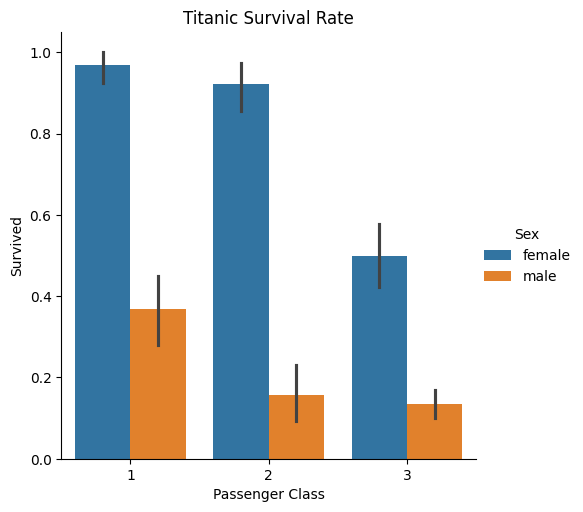

In [12]:
# Make a bar plot with seaborn showing surival rate by class and sex

sns.catplot(
    data=titanic,
    x="Pclass",
    y="Survived",
    hue="Sex",
    kind="bar",
).set(
    title="Titanic Survival Rate",
    xlabel="Passenger Class"
)

**Result:** Exactly what we showed above but with a visual.

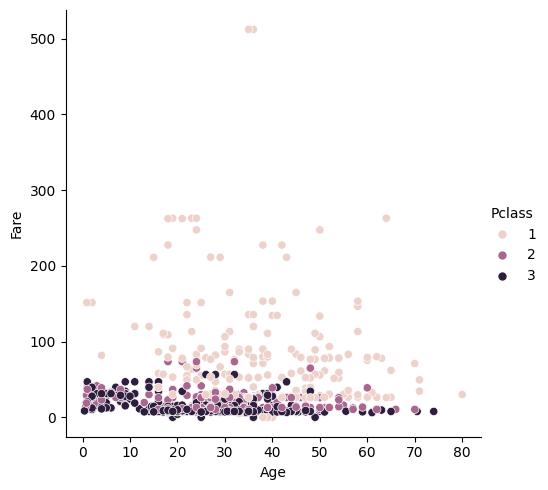

In [13]:
# Plot the fare by class and Age

sns.relplot(
    data=titanic,
    x="Age",
    y="Fare",
    hue="Pclass"
)

**Result:** Fares for 2nd and third classes were more consistent, while first class varies.

In [14]:
# To look at the distribution of prices it will help to have class be a str

titanic["Pclass"] = titanic["Pclass"].astype(str)

titanic["Pclass"]

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: object

<Axes: xlabel='Age', ylabel='Pclass'>

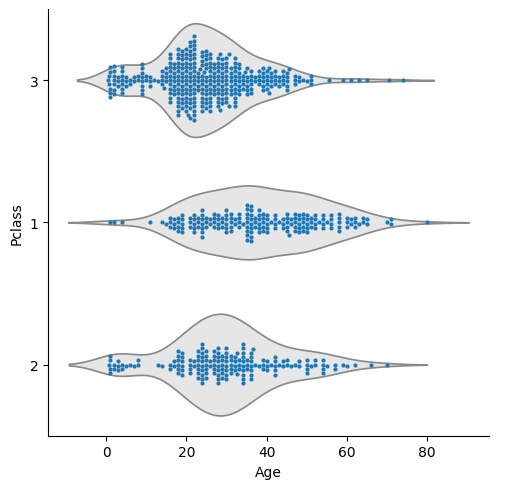

In [18]:
# Combination violin and swarmplot, right from the seaborn docs: https://seaborn.pydata.org/generated/seaborn.catplot.html

sns.catplot(data=titanic, x="Age", y="Pclass", kind="violin", color=".9", inner=None)
sns.swarmplot(data=titanic, x="Age", y="Pclass", size=3)

### Conclusion

Jupyter installed at the global/user-level can be made to create notebooks and connect to an ipythonkernel installed in a virtualenv.

### Documenting the Environment

Outside the notebook a new requirements.txt was generated:

1. Enter the directory of your project, where the notebooks live.
2. `pyenv activate polyglot_jupyter_example` (If your virtualenv isn't already active in your shell)
3. `pip freeze` > requirements.txt
4. You can now safely `pyenv deactivate` if you wish
5. The "requirements.txt" will then be tracked in the github repo and can be used to reconstruct the environment with `pip install -r requirements.txt` in the future.

In [4]:
# I also export the notebook as a .py script so it can be run without jupyter and .html so non-coders can view it
# These can be run outside of the notebook in a shell spawned by jupyter , as long as you have nbconvert installed in your local python version

! jupyter nbconvert --to script --output-dir ./polyglot_jupyter_example_py/ polyglot_jupyter_example_py.ipynb
! jupyter nbconvert --to html --output-dir ./polyglot_jupyter_example_py/ polyglot_jupyter_example_py.ipynb

[NbConvertApp] Converting notebook polyglot_jupyter_example_py.ipynb to script
[NbConvertApp] Writing 5365 bytes to polyglot_jupyter_example_py/polyglot_jupyter_example_py.py
[NbConvertApp] Converting notebook polyglot_jupyter_example_py.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 447956 bytes to polyglot_jupyter_example_py/polyglot_jupyter_example_py.html


### Cleaning-up

Outside the virtualenv you can:
1. `jupyter kernelspec list` - To get the installed kernels and identify the one used in this project.
2. `jupyter kernelspec remove polyglot_jupyter_example` - Remove the virtualenv from the list of kernels.
3. Keep the virtualenv kernel installed if you intend to use more ipython kernel-based notebooks in this project.